# HR Analytics

The data is taken from Analytics Vidya hackthon where two seperate data sets are given as train and test. Our target variable is the employee is promoted or not so this is binary classification problem. The train data has 54808 observations 14 features and test data set has 23490 observations and 13 variables. Based on 13 independent features classify the employee is promoted or not

Steps
1. Load necessary libraries
2. Import datasets
3. Variable study
4. Check missing values
5. Missing value imputations
6. Variable encoding
7. Build Random Forest model
8. Hyperparameter tuning with RandomizedSearchCV
9. Again build with best parameters


Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

Change WD to folder contains dats sets


In [2]:
import os
os.chdir("F:\Analytics Vidya\HR Analytics")

In [3]:
%pwd

'F:\\Analytics Vidya\\HR Analytics'

Import data sets

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

The sign '&' in variable name create problems so replaced it


In [5]:
train = train.replace("Master's & above","Master's_above")
train = train.replace("Sales & Marketing", "Sales_Marketing")
test = test.replace("Master's & above","Master's_above")
test = test.replace("Sales & Marketing", "Sales_Marketing")


In [6]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales_Marketing,region_7,Master's_above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales_Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales_Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales_Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Variable Study

In [10]:
train['is_promoted'].value_counts()


0    50140
1     4668
Name: is_promoted, dtype: int64

The target variable of training set contains 50140 employees are not promted

In [11]:
train['department'].value_counts()


Sales_Marketing    16840
Operations         11348
Technology          7138
Procurement         7138
Analytics           5352
Finance             2536
HR                  2418
Legal               1039
R&D                  999
Name: department, dtype: int64

In [12]:
test['department'].value_counts()

Sales_Marketing    7315
Operations         4764
Procurement        3020
Technology         3011
Analytics          2319
Finance            1091
HR                 1085
Legal               445
R&D                 440
Name: department, dtype: int64

In deparment variable same type of deparments in the both data sets are equally distributed 

In [13]:
train['education'].value_counts()

Bachelor's         36669
Master's_above     14925
Below Secondary      805
Name: education, dtype: int64

In [14]:
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

There are alomost 70% males in training data set

In [15]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

More than 50% employees recruit through other channel

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

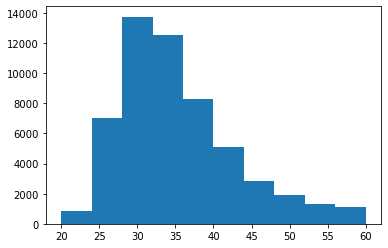

In [16]:
plt.hist(train['age'])

Major of employees are between 27 to 36 years

In [17]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

97% employees are not won any award

In [18]:
train['length_of_service'].value_counts().sort_values(ascending = True)

37       1
34       4
33       9
32      10
30      12
31      20
29      30
28      30
27      36
26      41
25      51
22      61
23      65
24      70
21      78
20     128
19     329
18     392
17     432
16     548
14     549
15     593
13     687
12     794
11     916
10    2193
9     2629
8     2883
1     4547
6     4734
7     5551
5     5832
2     6684
4     6836
3     7033
Name: length_of_service, dtype: int64

Major of employees length service between 1 to 10 years 

## Check the missing values in training data set


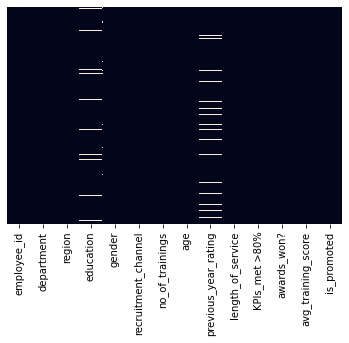

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

## Check the missing values in test data set


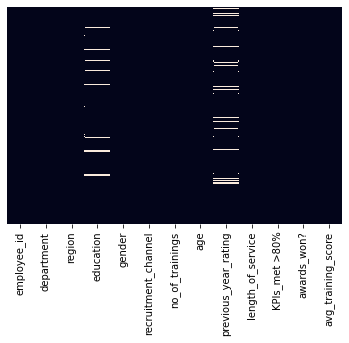

In [20]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

## Missing values imputation

Both train and test have missing values in education and previous year rating
education is categorical variable and previous year rating is ordinal variable
Use Simple imputer of impute class of sklearn for previous year rating

In [21]:
from sklearn.impute import SimpleImputer
impute1=SimpleImputer(strategy='median')
train1=pd.DataFrame(train.iloc[:,8:9])
test1=pd.DataFrame(test.iloc[:,8:9])
Previous_Year_RatingTr=pd.DataFrame(impute1.fit_transform(train1))
Previous_Year_RatingTe=pd.DataFrame(impute1.fit_transform(test1))


In [22]:
train2 = pd.concat([train.iloc[:,0:8], Previous_Year_RatingTr.iloc[:,:],
                   train.iloc[:,9:14]], ignore_index = False,axis =1 )
test2 = pd.concat([test.iloc[:,0:8], Previous_Year_RatingTe.iloc[:,:],
                   test.iloc[:,9:13]], ignore_index = False,axis =1 )

### Rename previous year rating


In [23]:
train3=train2.rename(columns={0:'Previous_Year_Rating'})
test3=test2.rename(columns={0:'Previous_Year_Rating'})


### Imputation for eduacation
The educatipn is categorical variable and if we apply modal value as impute value it allows bias
in data So, we replace missing value by missing


In [24]:
from feature_engine import missing_data_imputers as mdi
imputer=mdi.CategoricalVariableImputer()
train3=imputer.fit_transform(train3)
test3=imputer.fit_transform(test3)

### After imputation Check missing values in training and testing data set


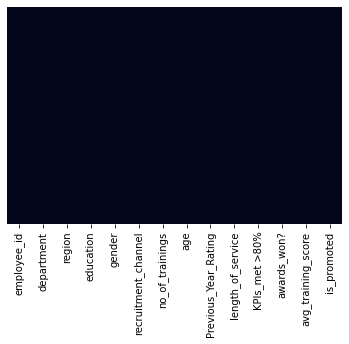

In [25]:
sns.heatmap(train3.isnull(),yticklabels=False,cbar=False)

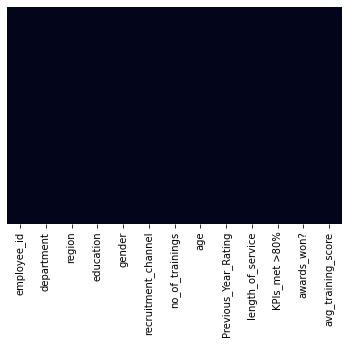

In [26]:
sns.heatmap(test3.isnull(),yticklabels=False,cbar=False)

### So, we succesfuly replace missing values in both training and testing


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


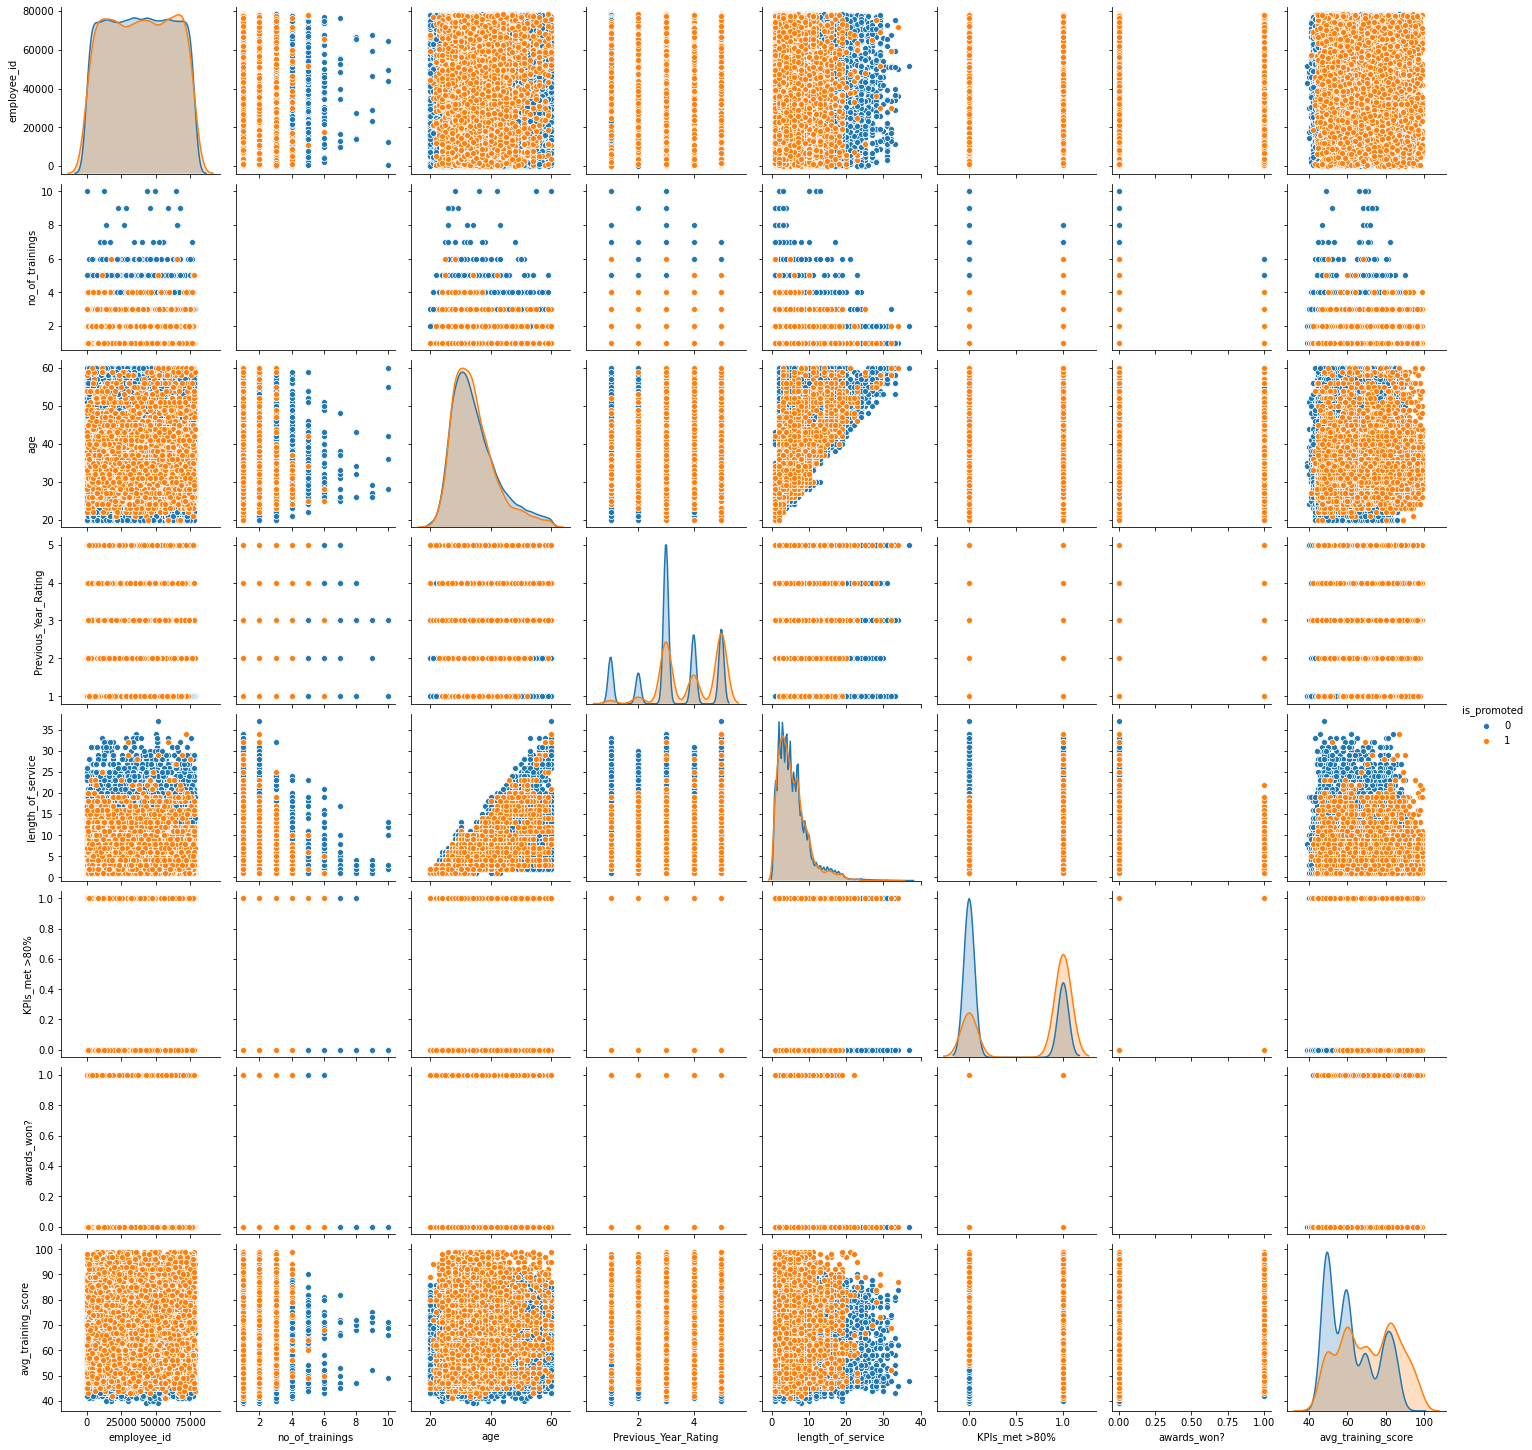

In [27]:
sns.pairplot(train3,hue='is_promoted')

We conclude from pair plot that here we can not apply logistic regression because variables are overlapping and logistic regression used for linear classification

## Variable encoding

One hot encoding for dapartment, region, education, gender, recruitment channel

In [28]:
train4 = pd.get_dummies(train3, drop_first = True)
test4 = pd.get_dummies(test3, drop_first = True)

Previous year rating is a ordinal variable so apply LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train4.Previous_Year_Rating = pd.DataFrame(labelencoder.fit_transform(train4.Previous_Year_Rating))
test4.Previous_Year_Rating = pd.DataFrame(labelencoder.fit_transform(test4.Previous_Year_Rating))


Convert both data set into homogeous scaling

In [30]:
train_final = pd.concat([train4.iloc[:,1:8],train4.iloc[:,9:56],train4.iloc[:,8]],axis=1)
test_final = pd.concat([test4.iloc[:,1:8],test4.iloc[:,9:55],test4.iloc[:,8]],axis=1)

## Model Building

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
x = train_final.iloc[:,0:54]
y = train_final.iloc[:,54:]

In [33]:
model_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [34]:
model_RF.fit(x,y)

<ipython-input-34-7532f6807be7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(x,y)


RandomForestClassifier(criterion='entropy', random_state=0)

In [35]:
y_pred = model_RF.predict(x)


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)


In [37]:
cm

array([[50135,     5],
       [    7,  4661]], dtype=int64)

In [38]:
missclassifiaction= ((7+5)/(50135+5+7+4661))*100
missclassifiaction

0.02189461392497446

As misclassifiaction error zero it seems our is over fitted. Therefore find best parameter for model to avoid over fitting

## Hyperparameter tuning

In [39]:
print(model_RF.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [40]:
RF = RandomForestClassifier(random_state = 0)
from sklearn.model_selection import RandomizedSearchCV

In [41]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1500,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [42]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [43]:
rand_ser_RF = RandomizedSearchCV(estimator =RF, param_distributions = random_grid, n_iter = 5, 
                                 cv = 3, verbose=2, random_state=0, n_jobs = -1)


In [44]:
rand_ser_RF.fit(x,y)



Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 255, 411, 566,
                                                         722, 877, 1033, 1188,
                                                         1344, 1500]},
                   random_state=0, verbose=2)

In [45]:

rand_ser_RF.best_params_

{'n_estimators': 722,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [46]:
best_model = RandomForestClassifier(n_estimators=722,min_samples_split=10,min_samples_leaf=1, 
                                    max_features='auto',max_depth=80,bootstrap=False)

In [47]:
best_model.fit(x,y)

<ipython-input-47-d7567e9f9964>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x,y)


RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=10,
                       n_estimators=722)

In [48]:
pred_best=best_model.predict(x)

In [49]:
cm_best=confusion_matrix(y,pred_best)

In [50]:
cm_best

array([[50133,     7],
       [ 1871,  2797]], dtype=int64)

In [51]:
 (5+1856)/(50135+5+1856+2812)

0.03395489709531455

misclassification error from best parameters is 3.4%

### Prediction test data set

In [52]:
x_test = test_final.iloc[:,0:54]

In [53]:

pred_test = pd.DataFrame(best_model.predict(x_test))

In [54]:
submission =pd.DataFrame(pd.concat([test.iloc[:,0:1],pred_test.iloc[:,:]],axis= 1))

In [55]:
submission.shape

(23490, 2)

Export prediction on test set to csv file

In [56]:
Sample_submission = submission.to_csv('F:\Analytics Vidya\HR Analytics\submission.csv',index=False)